In [ ]:
# Ahmad Sharif
# DATA.STAT.840-2023-2024-1 Statistical Methods for Text Data Analysis
# K436765

In [51]:
import requests
import bs4
import urllib.request

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [52]:
webpage_url = "https://www.sis.uta.fi/~tojape/"
webpage_html = requests.get(webpage_url)
webpage_parsed_html = bs4.BeautifulSoup(webpage_html.content, 'html.parser')
# webpage_parsed_html

1. It can crawl the same page multiple times, if a link on a later crawled page points to the
already-crawled page.
2. It inserts all links from each page in order as pages to be crawled. If some page contains
thousands of links, the crawling will crawl those first and may never get to the links from
the next page, especially if the total number of pages are limited.
To fix this duplicate issue, at first before insert into the list, I check if the url already exist list data-
structure.

In [53]:
def getpageurls(webpage_parsed):
    pagelinkelements=webpage_parsed.find_all('a')
    pageurls = [];
    for pagelink in pagelinkelements:
        pageurl_isok=1
        try:
            pageurl = pagelink['href']
        except:
            pageurl_isok=0
        if (pageurl.find('.pdf') !=-1)|(pageurl.find('.ps')!=-1):
            pageurl_isok = 0
        if (pageurl.find('http') ==-1 )|(pageurl.find('.fi')==-1):
            pageurl_isok = 0
        if pageurl_isok == 1 and pageurl not in pageurls: # Before Append we need to check ##
            pageurls.append(pageurl)
     
    return(pageurls)
mywebpage_urls = getpageurls(webpage_parsed_html)
for x in mywebpage_urls:
    print(x)
# print(mywebpage_urls)


https://www.tuni.fi/en
https://www.tuni.fi/en/about-us/faculty-information-technology-and-communication-sciences
https://www.tuni.fi/en/about-us/computing-sciences
http://cs.aalto.fi/en/
http://www.cis.hut.fi/projects/mi
http://users.ics.aalto.fi/jtpelto/
http://research.ics.aalto.fi/coin/
https://www.tuni.fi/en/study-with-us/computing-sciences-data-science?navref=curated--list
https://www.tuni.fi/en/study-with-us/computing-sciences-statistical-data-analytics?navref=curated--list
https://www.tuni.fi/studentsguide/curriculum/degree-programmes/uta-tohjelma-1717?year=2019
https://www.tuni.fi/studentsguide/curriculum/course-units/otm-d42bf3fb-ecd7-43ee-919e-3a18e0b7d885?year=2020&q=null
https://www.tuni.fi/studentsguide/curriculum/course-units/otm-386280c0-c76b-4837-b4e3-61a9d53130b4?year=2020
https://www.tuni.fi/studentsguide/curriculum/course-units/uta-ykoodi-48003?year=2019
https://www.tuni.fi/studentsguide/curriculum/course-units/uta-ykoodi-48010?year=2019
https://www.tuni.fi/studentsg

In [54]:
webpage_url = "https://gutenberg.org/browse/scores/top"
webpage_html = requests.get(webpage_url)
webpage_parsed_html = bs4.BeautifulSoup(webpage_html.content, 'html.parser')

## 2 ) a) 

In [55]:
pageList = webpage_parsed_html.find("h2", {"id": "books-last30"})
ol = pageList.find_next_sibling("ol")
book_list = {}


def collect_all_download_link(count):
    index = 0
    for x in (ol.findAll('li')):
        index = index + 1
        url = x.a['href']
        
        book_id = url.split('/')[2]
        book_name = x.a.text
        download_link = 'https://www.gutenberg.org/files/' + book_id + '/' + book_id + '-0.txt'
        print(index, " : ", download_link)
        if(index < count):
            book_list[book_id] = {
                "book_name": book_name,
                "download_link": download_link
            }
collect_all_download_link(20)
print(len(book_list)) 
# 20

1  :  https://www.gutenberg.org/files/84/84-0.txt
2  :  https://www.gutenberg.org/files/1513/1513-0.txt
3  :  https://www.gutenberg.org/files/1342/1342-0.txt
4  :  https://www.gutenberg.org/files/25344/25344-0.txt
5  :  https://www.gutenberg.org/files/11/11-0.txt
6  :  https://www.gutenberg.org/files/345/345-0.txt
7  :  https://www.gutenberg.org/files/174/174-0.txt
8  :  https://www.gutenberg.org/files/5200/5200-0.txt
9  :  https://www.gutenberg.org/files/64317/64317-0.txt
10  :  https://www.gutenberg.org/files/2542/2542-0.txt
11  :  https://www.gutenberg.org/files/1952/1952-0.txt
12  :  https://www.gutenberg.org/files/1080/1080-0.txt
13  :  https://www.gutenberg.org/files/2701/2701-0.txt
14  :  https://www.gutenberg.org/files/844/844-0.txt
15  :  https://www.gutenberg.org/files/43/43-0.txt
16  :  https://www.gutenberg.org/files/98/98-0.txt
17  :  https://www.gutenberg.org/files/41/41-0.txt
18  :  https://www.gutenberg.org/files/1661/1661-0.txt
19  :  https://www.gutenberg.org/files/61

In [6]:
## 2 > b Name And Link
index = 0
for x in book_list:
    index = index + 1
    print(index, "Book Name     :", book_list[x]["book_name"])
    print("  Download Link :", book_list[x]["download_link"])
    print()

1 Book Name     : Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (83654)
  Download Link : https://www.gutenberg.org/files/84/84-0.txt

2 Book Name     : Romeo and Juliet by William Shakespeare (63125)
  Download Link : https://www.gutenberg.org/files/1513/1513-0.txt

3 Book Name     : Pride and Prejudice by Jane Austen (54666)
  Download Link : https://www.gutenberg.org/files/1342/1342-0.txt

4 Book Name     : The Scarlet Letter by Nathaniel Hawthorne (37534)
  Download Link : https://www.gutenberg.org/files/25344/25344-0.txt

5 Book Name     : Alice's Adventures in Wonderland by Lewis Carroll (30517)
  Download Link : https://www.gutenberg.org/files/11/11-0.txt

6 Book Name     : Dracula by Bram Stoker (29837)
  Download Link : https://www.gutenberg.org/files/345/345-0.txt

7 Book Name     : The Picture of Dorian Gray by Oscar Wilde (25794)
  Download Link : https://www.gutenberg.org/files/174/174-0.txt

8 Book Name     : Metamorphosis by Franz Kafka (24788)
 

In [50]:
# 2 ) c) Use the processing pipeline described on the lecture to tokenize and lemmatize the downloaded books.

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import urllib


crawled_lemmatize_word_list = []
book_id = list(book_list.keys())[0]
url = "https://www.gutenberg.org/files/" + book_id + "/" + book_id + "-0.txt"
book_content = urllib.request.urlopen(url).read().decode('utf-8')

# print(book_content)



# Tokenize
book_word_list = word_tokenize(book_content)
# print(book_word_list)


# Lemmatize
lemmatizer = WordNetLemmatizer()
for word in book_word_list:
    l = lemmatizer.lemmatize(word).lower()
    nltk_text = nltk.Text(l)
    crawled_lemmatize_word_list.append(l)

In [29]:
'''for x in crawled_lemmatize_word_list:
    print(x)'''

'for x in crawled_lemmatize_word_list:\n    print(x)'

In [36]:
# 2.2 s) (d) Create a unified vocabulary from the ebooks; report the top-100 words.

import numpy as np
from nltk.probability import FreqDist

r = np.unique(crawled_lemmatize_word_list, return_inverse=True)

print(r[0][130:230])


vocabulary = sorted(set(r[0]))
# print(vocab)


['abandoned' 'abbey' 'abhor' 'abhorred' 'abhorred.' 'abhorrence'
 'abhorrent' 'abide' 'ability' 'abject' 'able' 'aboard' 'abode' 'abortion'
 'abortive' 'about' 'above' 'abroad' 'abrupt' 'absence' 'absence.'
 'absent' 'absolute' 'absolutely' 'absolution' 'absorbed' 'absorbing'
 'abstained' 'abstruse' 'abyss' 'acceded' 'accent' 'accept' 'acceptance'
 'accepted' 'accepting' 'access' 'accessed' 'accessible' 'accident'
 'accidentally' 'accompanied' 'accompany' 'accomplish' 'accomplished'
 'accomplishment' 'accordance' 'accorded' 'according' 'accordingly'
 'account' 'accounted' 'accumulated' 'accumulation' 'accuracy' 'accurate'
 'accursed' 'accusation' 'accuse' 'accused' 'accuses' 'accustomed'
 'achieve' 'achieved' 'achievement' 'aching' 'acknowledged' 'acorn'
 'acquaintance' 'acquainted' 'acquiesced' 'acquire' 'acquired'
 'acquirement' 'acquiring' 'acquisition' 'acquit' 'acquittal.' 'acquitted'
 'acquitted.' 'across' 'act' 'acted' 'acting' 'action' 'active' 'activity'
 'actor' 'actual' 'act

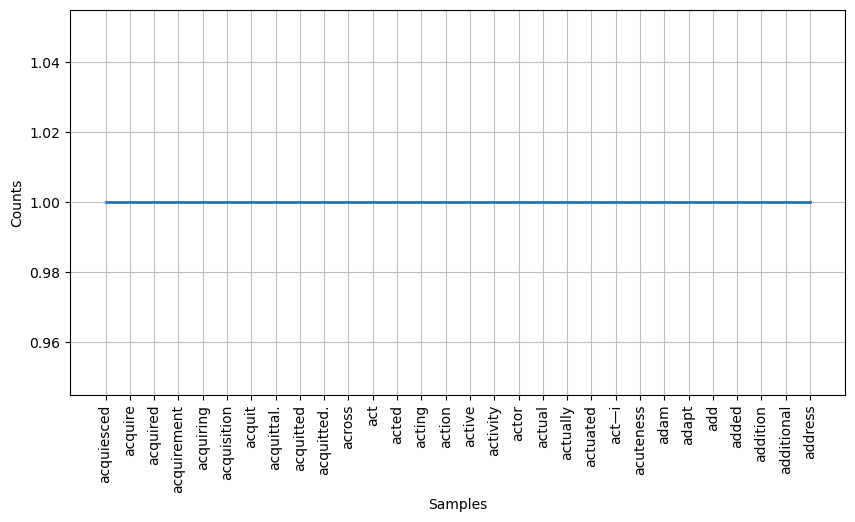

In [41]:
# Exercise 2.3: Zipf's law.
""" Use the top-20 books from Project Gutenberg to examine whether Zipf's law holds here too.
(a) Compute a plot of the frequencies of all words in the vocabulary (= count of each word,
divided by the total count of all words together), sorted by frequency. Report the plot. """

import matplotlib.pyplot as plt
from nltk.probability import FreqDist

freq_dist = FreqDist(vocabulary[200:230])
sorted_freq = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)

# Create a plot
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False) 
plt.show()

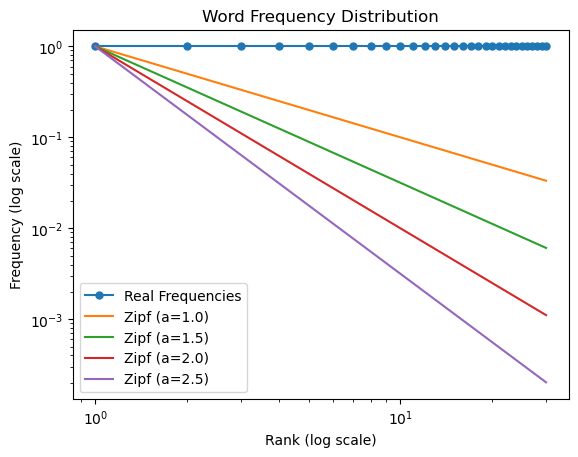

In [42]:
x = np.arange(1, len(sorted_freq) + 1)
y_real = [freq for word, freq in sorted_freq]
plt.plot(x, y_real, label="Real Frequencies", marker='o', markersize=5)

# Try different values of the exponent 'a'
for a in [1.0, 1.5, 2.0, 2.5]:
    y_zipf = [1 / (rank ** a) for rank in x]
    plt.plot(x, y_zipf, label=f'Zipf (a={a})')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.title("Word Frequency Distribution")
plt.show()

Exercise 2.4: Why is Zipf's law important?
The lectures introduced Zipf's law, but why is it important?
(a) Ask an AI chatbot what the importance of Zipf's law is; report what chatbot you used, your
query, and the chatbot's answer. (If you use several queries and answers, report them all.)

(b) Improve the chatbot's answer - rewrite it to add more insights. Try to provide at least three
more insights that Zipf's law could provide. Report your modified answer with the modified
parts of text highlighted.


2) a) In short, Zipf's law is important because it provides a mathematical model for the uneven distribution of elements in various datasets, from word frequencies in language to income distribution in economics. It's used in linguistics, information theory, data analysis, recommendation systems, and more to understand and model real-world phenomena with unequal distributions. 

From https://chat.openai.com/


b) 
1. It gives an mathematical model of word distribution and frequencies.
2. In addition, this laws also applicable in population size, city size, birth rate, death, online usage and many more
